##*EXAMEN FINAL*

Ingry Benel_ 20191301

**1. Instrumental Variables (IV)**

*   *Indetifique todos los elementos necesarios para implementar un enfoque de IV en este ejemplo.*

  ....

*   *Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones*

  ....

*   *¿El efecto de la educación sobre el nivel de ingresos es positivo o negativo? Argumente si los resultados serian causales o solamente de correlación*

  .....

**2. Regression Discontinuity Design (RDD)**

*   *Indetifique todos los elementos necesarios para implementar un RDD en este ejemplo.*

  ....

*   *Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.*

  ....

*   *¿El efecto de la politica sobre el rendimiento de los estudiantes sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación.*

  ....


**3. Difference in Difference (DiD)**

*   *Indetifique todos los elementos necesarios para implementar un DiD en este ejemplo.*

**ELEMENTOS NECESARIOS DEL MODELO DIFERENCIA EN DIFERENCIA:**  


  a.   Regresión causal:

> **Migración** *(outcome)* → **Empleo** *(Variable)*

  b.   Dos grandes bloques de datos:

> *Distribución del* **empleo** *en los* **años**

  c. Dos regiones:

> **Lima** *(treatment)* -  **Puno** *(control)*

  d. Temporalidad:

> *2017  a  2018*

  e. Paralelismo: 

> **2017**, *las pendientes de los empleos en este año son iguales: supuesto fundamental.*

-------------------------------------

*   *Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.*

> Primer paso:
Usted debe verificar el supuesto de tendencia paralela, evaluar que el estado de la evolución de la tendencia del Outcome principal debe ser paralelo antes de que la migración se introduzca: las tendencias previo a tratamiento deben ser paralelas en ambos grupos de control y de tratamiento. Esto permite preveer que no se estén considerando otras variables que pueden afectar a la tendencia. Una forma de limpiar el experimento.
De esta mane4ra, se puede decir que en el presente caso existe una tendencia paralela antes de la migración, debido que la migración venezolana en el año 2017, en ambas regiones, no experimentó **influencia de los migrantes**. 

> Segundo paso:
Resulta necesario mostrar la evolución de la variable durante un periodo de  tiempo establecido, y así identificar el factor que influye en la **diferencia** entre el grupo de tratamiento y el grupo de control.


> Tercer paso:
Construcción del esquema.

**(X_2 - X_1)  - (Y_2 - Y_1)**

En el que:

**X:** grupo tratamiento de la ciudad de *Lima*... 

* **X_1 -->** grupo tratamiento de Lima *previo* a la migración

* **X_2 -->** grupo tratamiento de Lima *posterior* a la migración

**Y:** grupo control de la ciudada de *Puno*

* **Y_1 -->** grupo de control de Puno *previo* a la migración

* **Y_2 -->** grupo de control de Puno *posterior* a la migración


> Cuarto paso:
La diferencia de estos promedio representa --> la diferencia causal que se da entre los grupos propuestos: de control y de tratamiento.

-------------------------------------

*   *¿El efecto de la migración sobre la tasa de empleo sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación.*

  ....


**4. Lecturas**

*   Bell, A., Chetty, R., Jaravel, X.,Petkova, N., & Van Reenen, J. (2019). Who becomes an inventor in America? The importance of exposure to innovation. The Quarterly Journal of Economics, 134(2), 647-713., **¿Cuáles son las debilidades del enfoque del paper para responder su pregunta de investigación?**

  El artículo se enfoca en responder cómo la falta de exposición a la innovación puede ayudar a explicar por qué los niños talentosos pretenecientes a familias de bajos ingresos tienen menor probabilidad de convertirse en inventores. Pese a que el texto cuenta con varios puntos rescatables, un aspecto débil de artículo es que los resultados encontrados reflejan la capacidad de un niño para innovar (especialmente a edades tempranas); si bien la capacidad aún podría representar una parte sustancial de las brechas de innovación, esta no brinda una evidencia concluyente sobre el papel del entorno porque los puntajes de las pruebas son una medida imperfecta de la capacidad. Por otro lado, otro punto débil en el trabajo, el cual va de la mano con el anterior aspecto, es el no haber introducido otras variables que se enfoquen en las habilidades del niño, ya que como se mencionó, no todo depende del entorno.


*   Dell, M. (2010). The persistent effects of Peru's mining mita. Econometrica, 78(6), 1863-1903, **¿Cuáles serían dos próximos pasos específicos para avanzar en su pregunta de investigación?**

  Este artículo se centra en analizar cuáles fueron los efectos a largo plazo del trabajo duro y forzoso en la mita, algunos como se menciona fueron la reducción del consumo en hogares y el retraso en el crecimiento de los niños. Si bien el presente trabajo de investigación permite concientizar sobre las consecuencias a largo plazo de la mita en la zona andina y visualizar variables importantes de calidad de vida humana, sí existen pasos a seguir para avanzar el desarrollo de una mejor respuesta a su pregunta de investigación. Primero, resulta importante profundizar el análisis en las diferentes regiones consideradas, debe de establecerse una segmentación de grupos según la presencia de los tipos de minerales explotados. Esto con el objetivo de medir, la influencia del valor del material explotado y la presencia de los terratenientes para el control del trabajo forzoso. Segundo, evaluar la efectividad del tipo de políticas públicas implementadas para reducir el impacto de las secuelas de zonas donde se establecieron instituciones como la mita. Ello con el objetivo de identificar los mejores pasos que ayuden a desarrollar un ambiente más favorable para una recuperación de igualdad en términos de desarrollo económico y social por parte de las zonas afectadas por las mitas.

**5. Código**

In [1]:
# pip install causalgraphicalmodels
# pip install linearmodels

import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns


> **Ploteo de Histogramas**

*   Grafique dos histogramas para la variable años de educación **educ** para cuando **nearc2 == 1**, y cuando **nearc2 == 0**. Compare y describa los patrones que encuentra*

In [2]:
# load data

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


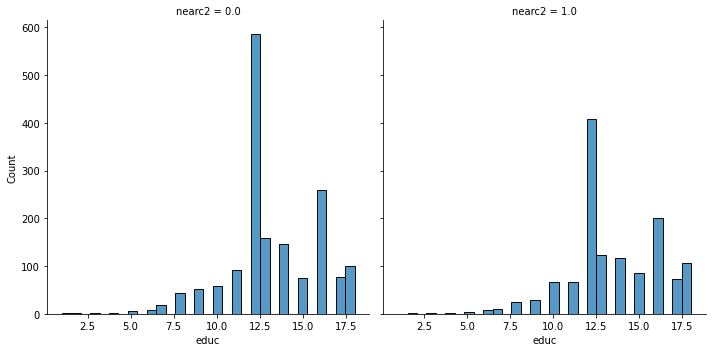

In [3]:
sns.displot(card, x = "educ", col = "nearc2")

:. Interpretación:

*   Grafique dos histogramas para la variable logaritmos de los ingresos **lwage** para cuando **nearc2 == 1**, y cuando **nearc2 == 0**. Compare y describa los patrones que encuentra.

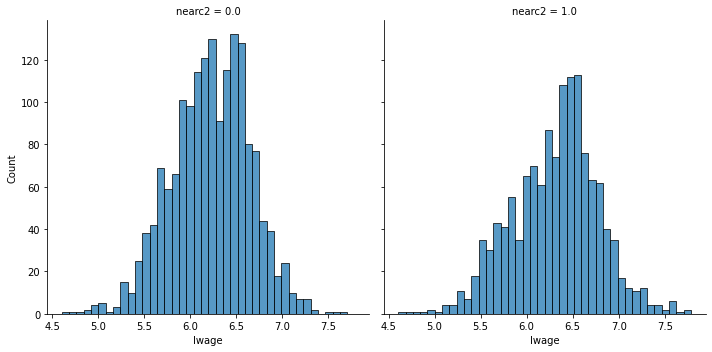

In [4]:
sns.displot(card, x = "lwage", col = "nearc2")

:. Interpretación:



> **Regresiones**

*   Corran una regresion lineal del tipo **"lwage ~ educ + exper + black + south + married + smsa"**, y expliquen los resultados que encuentran.


In [5]:
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          1.97e-232
Time:                        22:55:52   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*   Corran una regresion de tipo IV(usando el paquete **IV2SLS**) donde van a instrumentalizar la variable **educ** con **nearc2**.
  
  Compare los resultados encontrados usando **IV2SLS** con la primera regresión. ¿Cambió el coeficiente relacionado a **educ** , por qué?

In [7]:
card['married'] = card['married'].fillna(0)

iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2 ]", card).fit()
iv_reg.summary

NameError: ignored